In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from chart import show, show_collection

### Math Morphology

#### Erosion

The erosion of an image $A$ by a structuring element $B$ is defined as the set of all points $(x, y)$ such that the origin of $B$ is at $(x, y)$ and $B$ is completely contained in $A$. Formally, the erosion of $A$ by $B$ is given by

$$A \ominus B = \{ (x, y) \mid B_{(x, y)} \subseteq A \}$$

where $B_{(x, y)}$ is the translation of $B$ by $(x, y)$.



A more simple example of the erosion operation is the following:

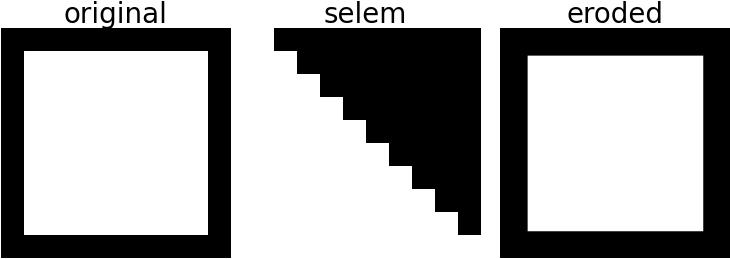

In [4]:
import numpy as np
from skimage.morphology import binary_erosion

# Create a 250x250 image
image = np.zeros((250, 250), dtype=np.uint8)

# Calculate the starting and ending indices for the square
start = 25
end = 225

# Set the square region to 1
image[start:end, start:end] = 1

# Create a 10x10 structuring element with a triangular shape
selem = np.zeros((10, 10), dtype=np.uint8)
selem[np.tril_indices(10, 0)] = 1

# Perform erosion
eroded_image = binary_erosion(image, selem)

# Display the result
show_collection([image, selem, eroded_image], titles=["original", "selem", "eroded"], cmap="gray", scale=0.1, fontsize=20)


A more interesting example is the following:

The image is inverted!


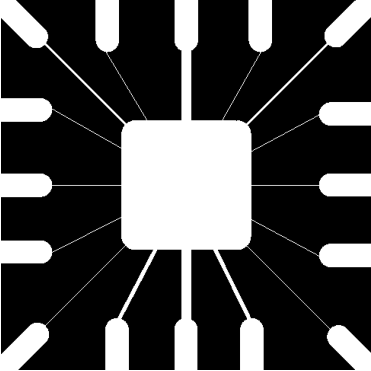

In [5]:
from skimage import io
import numpy as np
import tifffile

# load the image
image_path = "wirebond.tif"
image = io.imread(image_path)

# There is an issue with this image: the metadata assumes that the minimum value should be assigned to the white color
with tifffile.TiffFile(image_path) as tif:
    photometric_interpretation = tif.pages[0].tags['PhotometricInterpretation'].value
    if photometric_interpretation == tifffile.PHOTOMETRIC.MINISWHITE:
        print("The image is inverted!")
        image = np.logical_not(io.imread('wirebond.tif'))       

# Load the image and invert it so that the object is white on a black background
show(image, cmap="gray", scale=0.1)


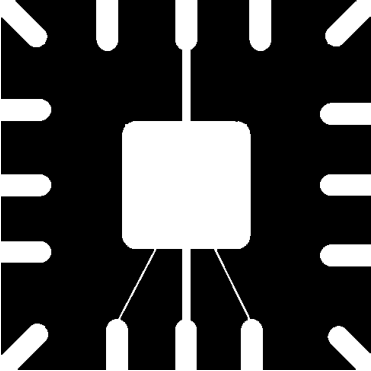

In [6]:
from skimage.morphology import square, binary_erosion
from chart import show

# create a square structured element
selem = square(3)  # you can change the size of the square as needed

# erode the image
eroded_image = binary_erosion(image, selem)

# display the eroded image
show(eroded_image, cmap="gray", scale=0.1)


#### Erosion with multiple structuring elements

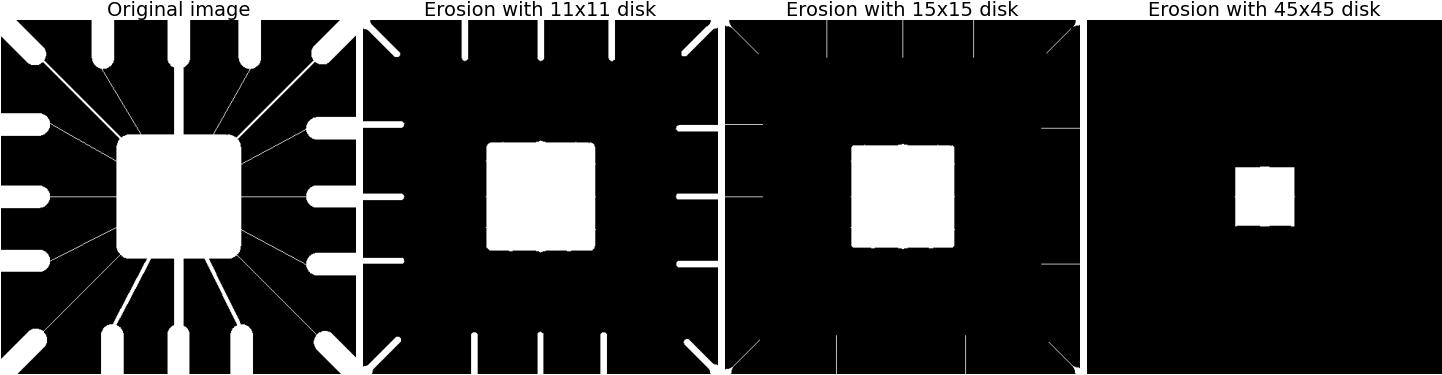

In [7]:
from skimage.morphology import disk, binary_erosion
from chart import show_collection

# eroded images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [11, 15, 45]:
    selem = disk(s)
    eroded_image = binary_erosion(image, selem)
    images.append(eroded_image)
    titles.append('Erosion with {}x{} disk'.format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap="gray")

### Dilation

The dilation of an image $A$ by a structuring element $B$ is defined as the set of all points $(x, y)$ such that the origin of $\hat{B}$ is at $(x, y)$ and $\hat{B}$ contains at least one point in $A$. Formally, the dilation of $A$ by $B$ is given by

$$A \oplus B = \{ (x, y) \mid \hat{B}_{(x, y)} \cap A \neq \emptyset \}$$

where $\hat{B}_{(x, y)}$ is the translation of $B$ by $(x, y)$.

A simple example:

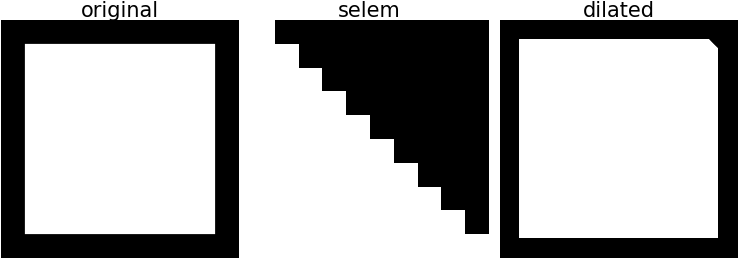

In [8]:
import numpy as np
from skimage.morphology import binary_dilation

# Create a 250x250 image
image = np.zeros((250, 250), dtype=np.uint8)

# Calculate the starting and ending indices for the square
start = 25
end = 225

# Set the square region to 1
image[start:end, start:end] = 1

# Create a 10x10 structuring element with a triangular shape
selem = np.zeros((10, 10), dtype=np.uint8)
selem[np.tril_indices(10, 0)] = 1

# Perform dilation
dilated_image = binary_dilation(image, selem)

# Display the result
show_collection([image, selem, dilated_image], titles=["original", "selem", "dilated"], cmap="gray", scale=0.1, fontsize=15)

A more interesting example is the following:

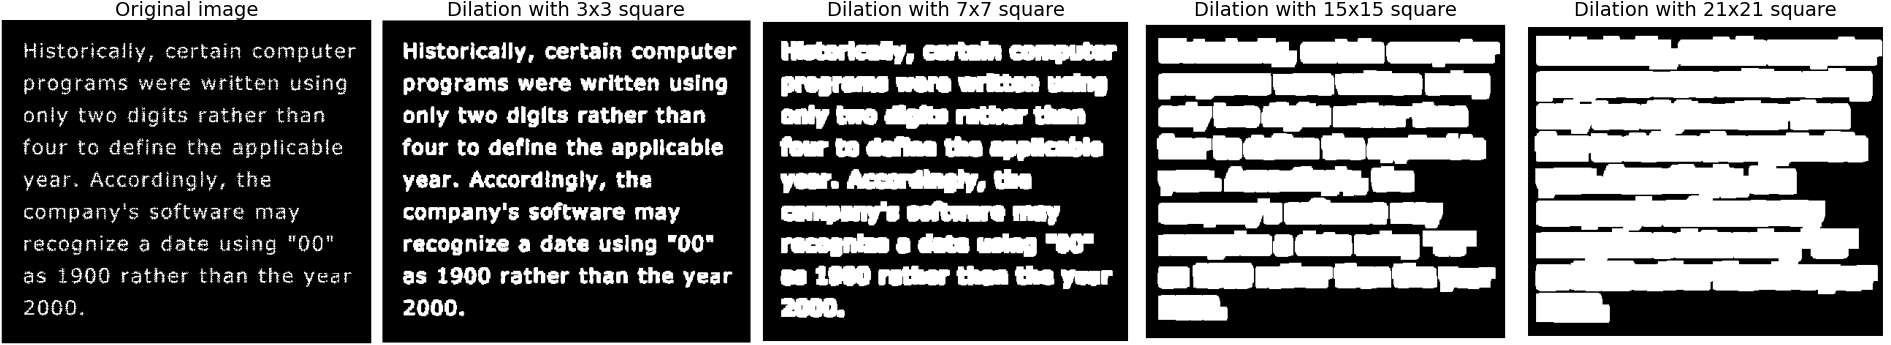

In [9]:
from skimage.morphology import square, binary_dilation
from chart import show_collection

# load the image
image = io.imread("text.tif")

# dilated images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [3, 7, 15, 21]:
    selem = square(s)
    dilated_image = binary_dilation(image, selem)
    images.append(dilated_image)
    titles.append("Dilation with {}x{} square".format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap="gray")

### Closing

The closing of an image $A$ by a structuring element $B$ is defined as the dilation of the erosion of $A$ by $B$. Formally, the closing of $A$ by $B$ is given by

$$A \bullet B = (A \ominus B) \oplus B.$$

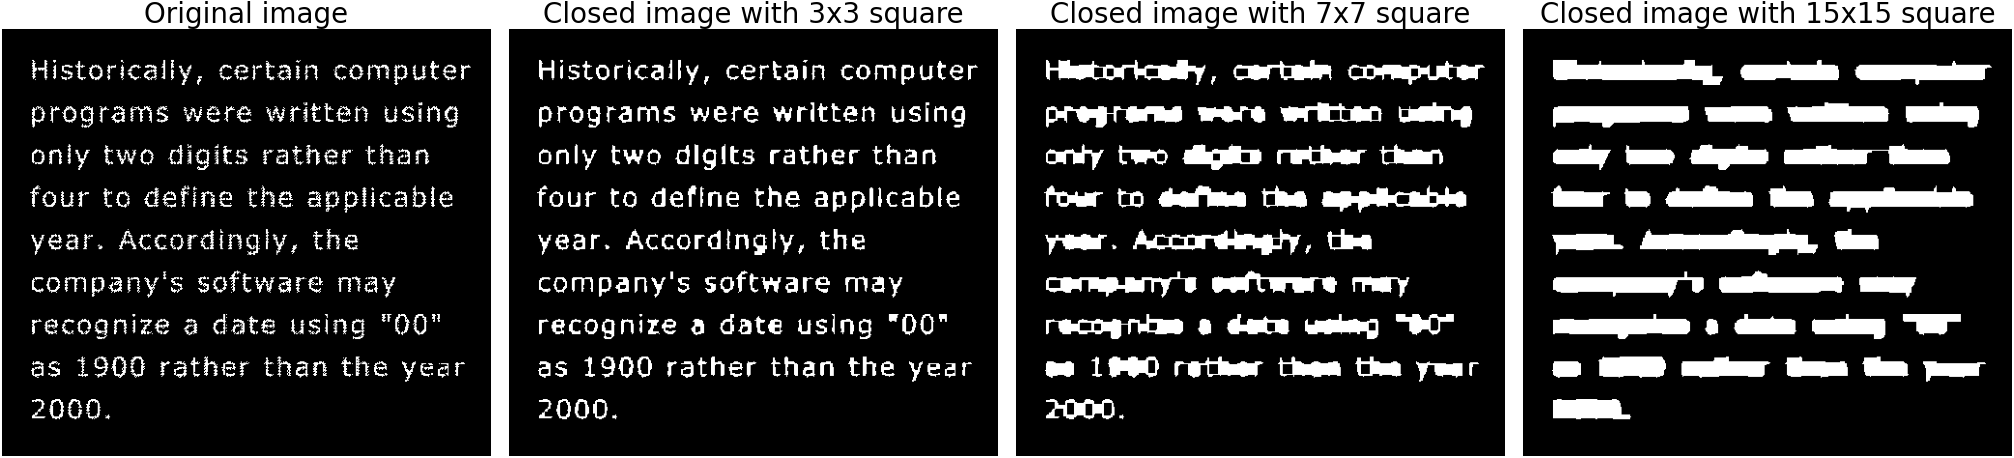

In [10]:
from skimage.morphology import square, binary_closing
import matplotlib.pyplot as plt
import tifffile

# load the image
image = io.imread("text.tif")

# images after closing
images = [image]
titles = ["Original image"]

for s in [3, 7, 15]:
    # Define the structuring element
    selem = square(s)
    
    # Perform closing
    closed = binary_closing(image, selem)
    images.append(closed)

    titles.append("Closed image with {}x{} square".format(s, s))

show_collection(images, titles, fontsize=20, scale=0.1, cmap="gray")

### Opening

The opening of an image $A$ by a structuring element $B$ is defined as the erosion of the dilation of $A$ by $B$. Formally, the opening of $A$ by $B$ is given by

$$A \circ B = (A \oplus B) \ominus B.$$

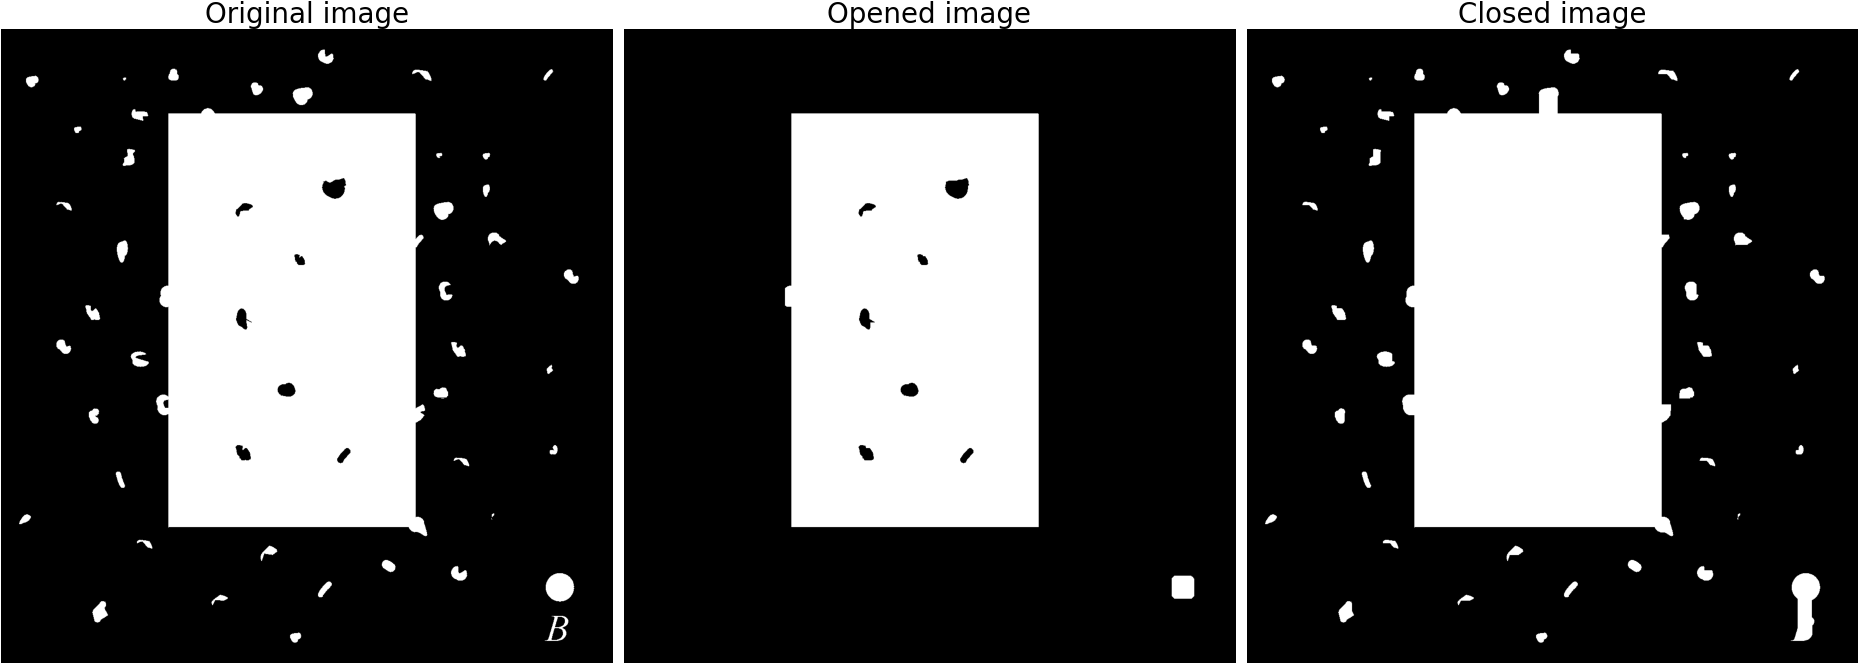

In [11]:
from skimage.morphology import square, binary_opening, binary_closing

# load the image
image = io.imread("noisy.tif")

# Define the structuring element
selem = square(35)

# Perform opening and closing
opened = binary_opening(image, selem)
closed = binary_closing(image, selem)
titles = ['Original image', 'Opened image', 'Closed image']

show_collection([image, opened, closed], titles, scale=0.05, cmap="gray", fontsize=20)

### Hit-or-miss transform (HMT)

The hit-or-miss transform is a basic tool for shape detection. It is defined as the set of all points $(x, y)$ such that $B_{(x, y)}$ is completely contained in $A$ and $C_{(x,y)}$ is completely contained in the complement of $A$. Formally, the hit-or-miss transform of $A$ by $B$ and $C$ is given by

$$A \odot (B, C) = \{ (x, y) \mid B_{(x, y)} \subseteq A \text{ and } C_{(x, y)} \subseteq A^c \},$$

where $A^c$ is the complement of $A$.

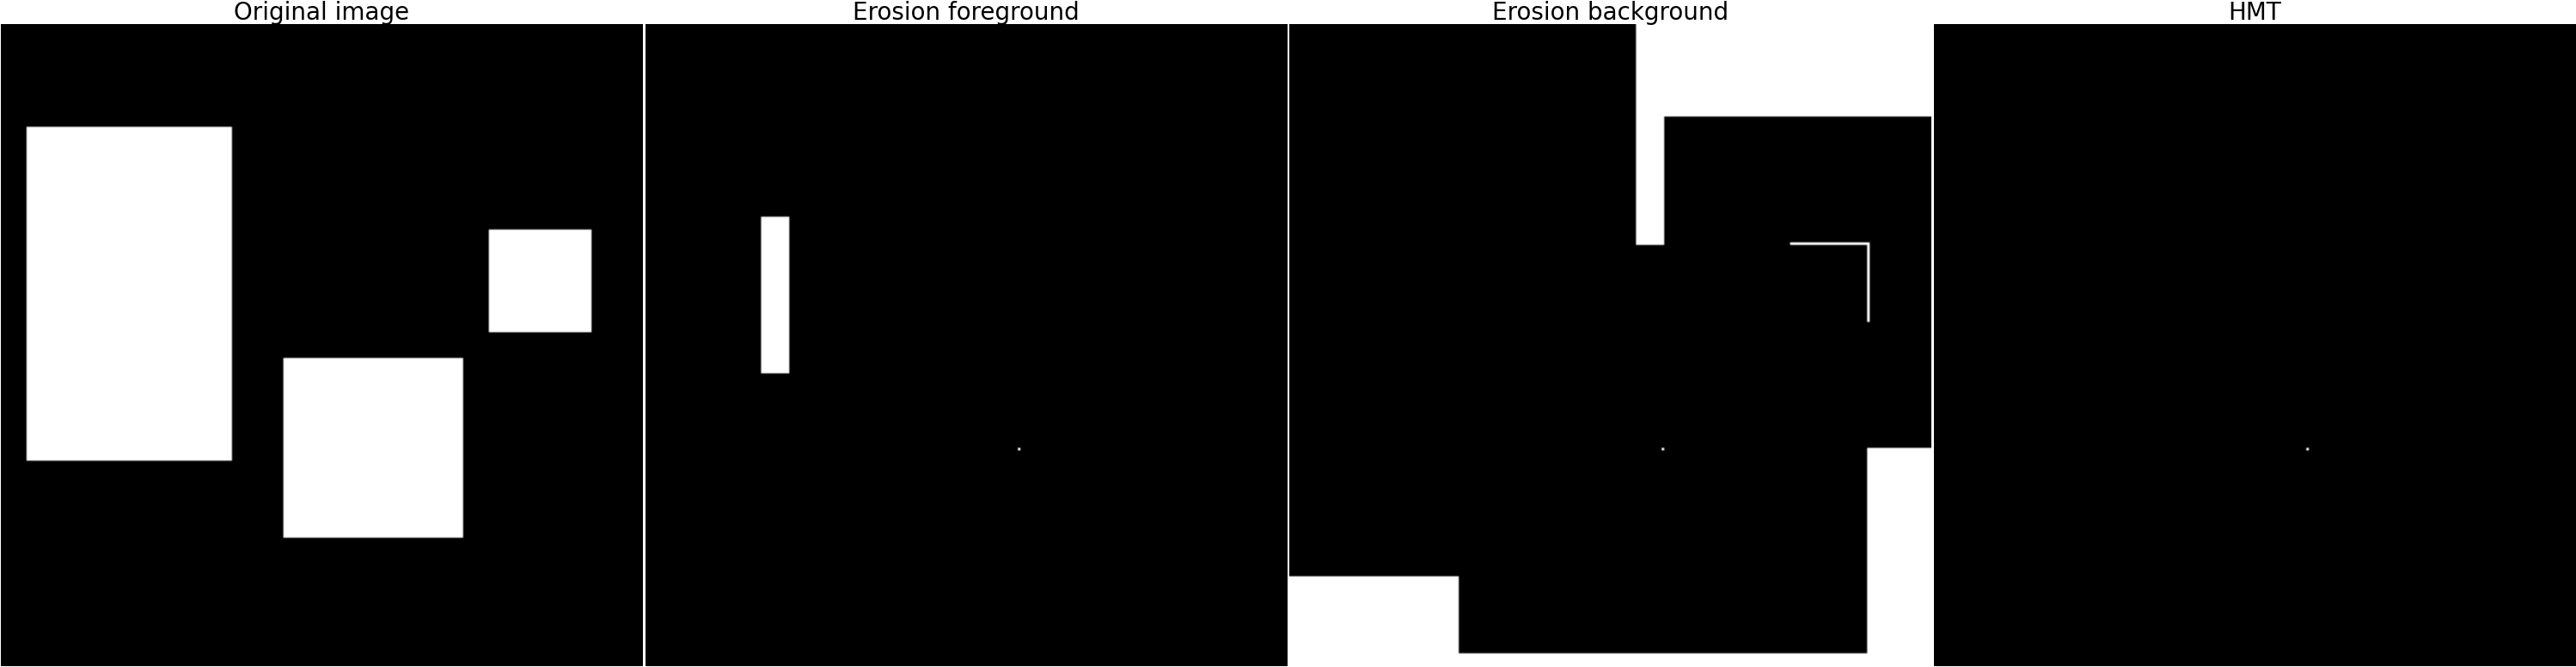

In [40]:
from skimage.morphology import square, binary_opening, binary_closing

A = np.zeros((250, 250), dtype=np.uint8)

A[40:170, 10:90] = 1 # C 
A[130:200, 110:180] = 1# D 50x50
A[80:120, 190:230] = 1 # E    

# Define the structuring element
D = square(70) # W
W_D = np.zeros((90, 90), dtype=np.uint8)
W_D[:10] = 1
W_D[-10:] = 1
W_D[:, :10] = 1
W_D[:, -10:] = 1

erosion_fg = binary_erosion(A, D)
erosion_bg = binary_erosion(1-A, W_D)
hmt = erosion_fg & erosion_bg

titles = ['Original image', 'Erosion foreground', 'Erosion background', 'HMT']
show_collection([A, erosion_fg, erosion_bg, hmt], titles, scale=0.3, cmap="gray", fontsize=20)